In [76]:
import pandas as pd

In [77]:
data = pd.read_csv('DS/student_assignment.csv')

In [78]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
99,42.0,46673.04,False,5.0,38.8,10.9
100,35.0,27089.59,True,5.0,35.3,1.6
101,61.0,83082.63,True,4.0,35.6,3.7
102,39.0,61868.49,True,5.0,37.1,3.8


In [79]:
data.shape

(104, 6)

In [80]:
data.describe()

,Age,Income,Num Children,Temperature,Rating
count,103.000000,104.000000,101.000000,104.000000,104.000000
mean,52.932039,58456.756442,3.059406,38.399038,3.295192
std,66.249567,22150.934058,4.046781,2.083010,1.448426
min,18.000000,20955.370000,0.000000,35.200000,-3.200000
25%,31.500000,40065.965000,2.000000,36.700000,2.600000
50%,42.000000,58014.560000,3.000000,38.400000,3.400000
75%,53.500000,74489.015000,4.000000,39.925000,4.100000
max,511.000000,99072.180000,40.000000,41.900000,10.900000


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [82]:
data.duplicated().sum()

3

In [83]:
data.drop_duplicates(inplace=True)

In [84]:
data.shape

(101, 6)

In [85]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [86]:
data['Age'].mean()

53.31

In [87]:
data['Age'].median()

42.0

In [88]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [89]:
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

<AxesSubplot:>

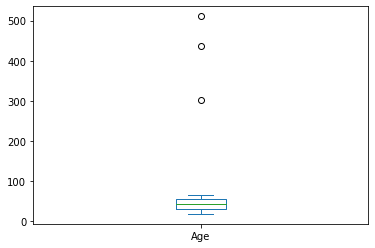

In [90]:
data['Age'].plot(kind = 'box')

In [91]:
data['Num Children'].mean()

3.020408163265306

In [92]:
data['Num Children'].median()

3.0

In [93]:
data['Num Children'].mode()[0]

4.0

In [94]:
data['Num Children'] = data['Num Children'].fillna(data['Num Children'].mode()[0])

In [95]:
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    0
Temperature     0
Rating          0
dtype: int64

In [96]:
#Script to find the outliers
import numpy as np
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Age
Outliers =  7     511.0
19    301.0
47    438.0
Name: Age, dtype: float64
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  82    40.0
Name: Num Children, dtype: float64
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)


In [97]:
data = data[data['Age']<100]

In [98]:
data = data[data['Num Children']<10]

In [99]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,42.0,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
96,48.0,90964.58,False,2.0,38.9,3.9
97,58.0,70679.33,True,4.0,41.3,4.8
98,50.0,97052.37,True,2.0,37.1,4.6
99,42.0,46673.04,False,5.0,38.8,10.9


In [100]:
data['Is Student'].unique()

array(['True', 'False', 'NO', 'Yes', 'false', 'true', 'YES'], dtype=object)

In [101]:
data['Is Student'].replace({'True':'Student','False':'Not Student','Yes':'Student','true':'Student','YES':'Student','NO':'Not Student','false':'Not Student'},inplace=True)

In [102]:
data['Is Student'].unique()

array(['Student', 'Not Student'], dtype=object)

In [103]:
data_num = data.select_dtypes(include = np.number)

In [104]:
data_num

,Age,Income,Num Children,Temperature,Rating
0,43.0,45893.41,0.0,38.2,2.6
1,56.0,69663.07,1.0,38.7,3.2
2,42.0,45124.06,5.0,36.9,3.9
3,37.0,76724.60,2.0,41.6,2.5
4,53.0,58343.03,1.0,36.5,3.3
...,...,...,...,...,...
96,48.0,90964.58,2.0,38.9,3.9
97,58.0,70679.33,4.0,41.3,4.8
98,50.0,97052.37,2.0,37.1,4.6
99,42.0,46673.04,5.0,38.8,10.9


In [105]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [106]:
scaling = StandardScaler()
data_scale = pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

In [107]:
data_scale

,Age,Income,Num Children,Temperature,Rating
0,0.078707,-0.584479,-1.694020,-0.103024,-0.503339
1,1.091452,0.486468,-1.064441,0.138360,-0.093628
2,0.000803,-0.619143,1.453871,-0.730622,0.384368
3,-0.388714,0.804627,-0.434863,1.538388,-0.571625
4,0.857741,-0.023559,-1.064441,-0.923730,-0.025343
...,...,...,...,...,...
92,0.468224,1.446212,-0.434863,0.234914,0.384368
93,1.247259,0.532256,0.824293,1.393558,0.998935
94,0.624031,1.720499,-0.434863,-0.634069,0.862365
95,0.000803,-0.549353,1.453871,0.186637,5.164333


In [108]:
data_cat = data.select_dtypes(exclude = np.number)

In [109]:
data_cat

,Is Student
0,Student
1,Student
2,Not Student
3,Not Student
4,Not Student
...,...
96,Not Student
97,Student
98,Student
99,Not Student


In [110]:
student_data = pd.get_dummies(data_cat['Is Student'])

In [111]:
student_data

,Not Student,Student
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
96,1,0
97,0,1
98,0,1
99,1,0


In [112]:
student_data = student_data.reset_index().drop(columns = 'index')

In [113]:
student_data

,Not Student,Student
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
92,1,0
93,0,1
94,0,1
95,1,0


In [116]:
final_data = pd.concat([data_scale, student_data], axis = 1)

In [117]:
final_data

,Age,Income,Num Children,Temperature,Rating,Not Student,Student
0,0.078707,-0.584479,-1.694020,-0.103024,-0.503339,0,1
1,1.091452,0.486468,-1.064441,0.138360,-0.093628,0,1
2,0.000803,-0.619143,1.453871,-0.730622,0.384368,1,0
3,-0.388714,0.804627,-0.434863,1.538388,-0.571625,1,0
4,0.857741,-0.023559,-1.064441,-0.923730,-0.025343,1,0
...,...,...,...,...,...,...,...
92,0.468224,1.446212,-0.434863,0.234914,0.384368,1,0
93,1.247259,0.532256,0.824293,1.393558,0.998935,0,1
94,0.624031,1.720499,-0.434863,-0.634069,0.862365,0,1
95,0.000803,-0.549353,1.453871,0.186637,5.164333,1,0
